# Анализ бизнес-показателей

В нашем распоряжении данные о пользователях развлекательного приложения Procrastinate Pro+, привлечённых с 1 мая по 27 октября 2019 года:

1. лог сервера с данными об их посещениях,
2. выгрузка их покупок за этот период,
3. рекламные расходы.

Предстоит изучить:

1. откуда приходят пользователи и какими устройствами они пользуются,
2. сколько стоит привлечение пользователей из различных рекламных каналов;
4. когда расходы на привлечение клиента окупаются,
5. какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

**1.1 Загрузка данных**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

**1.2 Изучение датасетов и подготовка к анализу**

Начнем с датасета **visits**

In [2]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [3]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Переименуем столбцы

In [4]:
visits.columns=['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

Тип данных соответствует значениям. С данными в колнках 'session_start' и 'session_end' будем работать в последнем подпункте.

Посмотрим есть ли пропуски в датасете **visits** 

In [5]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Пропусков нет


Определим количество дубликатов


In [6]:
visits.duplicated().sum()

0

Далее продолжим работать с датаетом **orders**

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Переименнуем столбцы

In [8]:
orders.columns=['user_id', 'event_dt', 'revenue']

In [9]:
orders.head(5)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Тип данных соответсвует значениям

Определим количество пропусков 

In [10]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

Определим количество дубликатов 

In [11]:
orders.duplicated().sum()

0

Возьмем следующий датасет **costs**

In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Переименуем столбцы

In [13]:
costs = costs.rename(columns={'Channel':'channel'})

In [14]:
costs.head(5)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Тип данных соответствует значениям

Определим количество пропусков


In [15]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Определим количество дубликатов


In [16]:
costs.duplicated().sum()

0

**1.3 Преобрауем данные в колонках с датой**

In [17]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


У нас имеются 3 таблицы с данными о посещениях сайта Яндекс.Афиши за период с 1 мая по 27 октября 2019 года, выгрузкой всех заказов за этот период и статистикой рекламных расходов. В данных нет пропусков,столбцы с датами привели к типу datetime. В таблицах visits и orders нужно переименовали столбцы, чтобы с ними было удобнее работать.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**2.1 Функции для вычисления метрик**

**2.1.1 get_profiles() — для создания профилей пользователей**

In [18]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**2.1.2 get_retention() — для подсчёта Retention Rate**

In [19]:

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**2.1.3 get_conversion() — для подсчёта конверсии**

In [20]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


**2.1.4 get_ltv() — для подсчёта LTV**

In [21]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**2.2 Функции для построения графиков**

**2.2.1 filter_data() — для сглаживания данных**

In [22]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

**2.2.2 plot_retention() — для построения графика Retention Rate**

In [23]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

**2.2.3 plot_conversion() — для построения графика конверсии**

In [24]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**2.2.4 plot_ltv_roi — для визуализации LTV и ROI**

In [25]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**3.1 Составим профили пользователей. Определите минимальную и максимальную даты привлечения пользователей**

In [26]:
profiles = get_profiles(visits, orders, None, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [27]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [28]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

Таблица хранит в себе данные с 1 мая 2019 года до 27 октября 2019 года

**3.2 Выясним из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.**

In [29]:
profiles.groupby('region').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


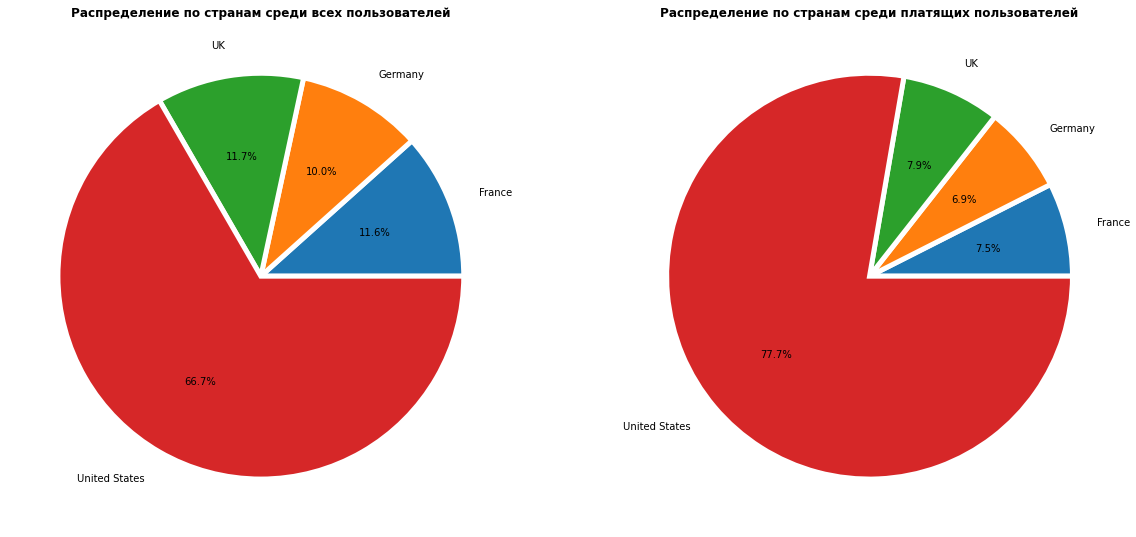

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 25))

ax1.pie(profiles.groupby('region').agg({'user_id':'nunique'}).reset_index()['user_id'],
        labels=profiles.groupby('region').agg({'user_id':'nunique'}).reset_index()['region'],
        labeldistance=1.15, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, autopct='%1.1f%%')
ax1.set_title('Распределение по странам среди всех пользователей', fontweight='bold')

ax2.pie(profiles.query('payer == True').groupby('region').agg({'user_id':'nunique'}).reset_index()['user_id'],
       labels=profiles.query('payer == True').groupby('region').agg({'user_id':'nunique'}).reset_index()['region'],
       labeldistance=1.15, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, autopct='%1.1f%%')
ax2.set_title('Распределение по странам среди платящих пользователей', fontweight='bold')

plt.show()

Судя по двум диаграммам можно сделать вывод,что больше всего пользователей пиходят из США (66,7%). Затем примерно равное распределение прихода пользователей из  Великобританиии(11,7%), Франции(11.6%) и Германии (10,0%). Также стоит отметить , что   7 % пользователей из США являются платящими, самый большой процент среди стран. У великобритании , Германии и Франции около 4 %.

**3.3 Узнаем ,какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.**

In [31]:
profiles.groupby('device').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


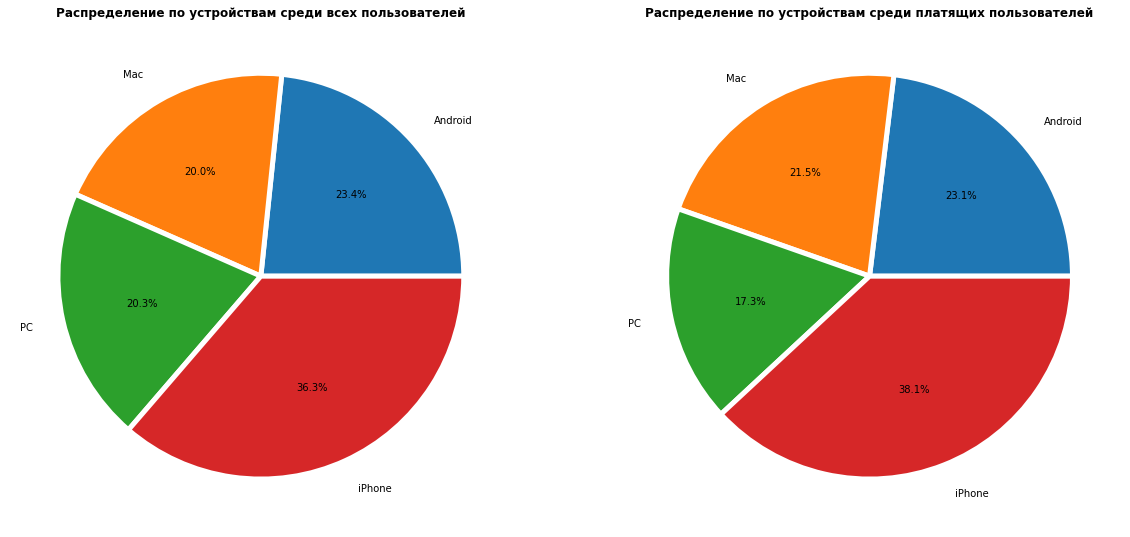

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 25))

ax1.pie(profiles.groupby('device').agg({'user_id':'nunique'}).reset_index()['user_id'],
        labels=profiles.groupby('device').agg({'user_id':'nunique'}).reset_index()['device'],
        labeldistance=1.15, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, autopct='%1.1f%%')
ax1.set_title('Распределение по устройствам среди всех пользователей', fontweight='bold')

ax2.pie(profiles.query('payer == True').groupby('device').agg({'user_id':'nunique'}).reset_index()['user_id'],
       labels=profiles.query('payer == True').groupby('device').agg({'user_id':'nunique'}).reset_index()['device'],
       labeldistance=1.15, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, autopct='%1.1f%%')
ax2.set_title('Распределение по устройствам среди платящих пользователей', fontweight='bold')

plt.show()

Пользователи с Iphone составляют больше 36%. Дальше идут пользователи с Android (23,4%) , PC (20,3 %) и Mac (20,0%). Процет платящих пользователей больше всего у Mac - 6.4%, не сильно отстает IPhone - 6.2%, у Android - 5.9%, в отстающих PC с 5%.

**3.4 Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.**

In [33]:
profiles.groupby('channel').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


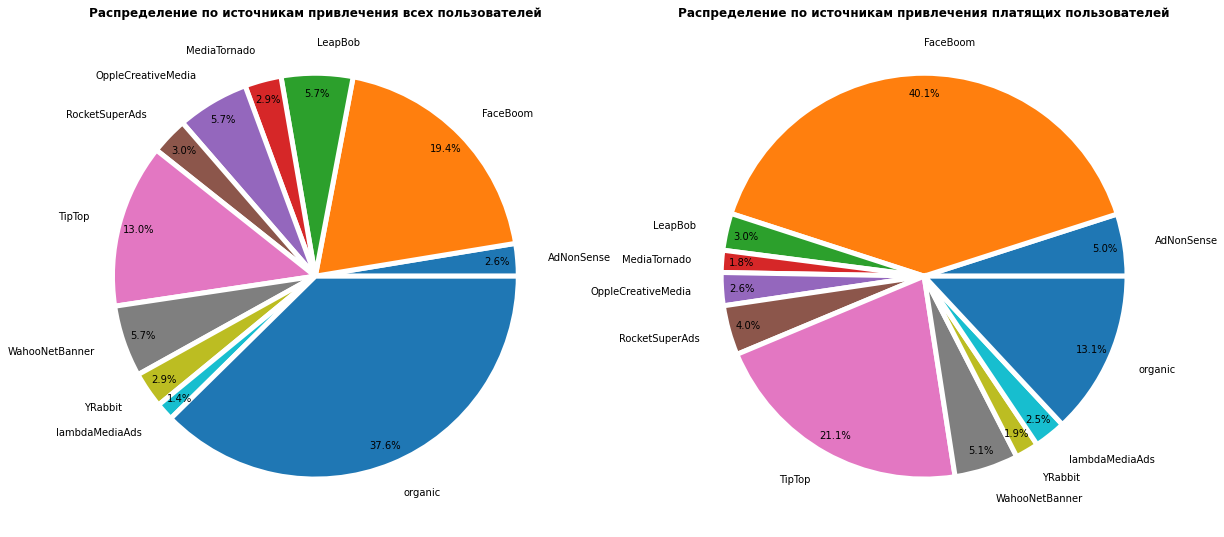

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 25))

ax1.pie(profiles.groupby('channel').agg({'user_id':'nunique'}).reset_index()['user_id'],
        labels=profiles.groupby('channel').agg({'user_id':'nunique'}).reset_index()['channel'],
        labeldistance=1.15, pctdistance=0.9,  wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, autopct='%1.1f%%')
ax1.set_title('Распределение по источникам привлечения всех пользователей', fontweight='bold')

ax2.pie(profiles.query('payer == True').groupby('channel').agg({'user_id':'nunique'}).reset_index()['user_id'],
       labels=profiles.query('payer == True').groupby('channel').agg({'user_id':'nunique'}).reset_index()['channel'],
       labeldistance=1.15, pctdistance=0.9, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, autopct='%1.1f%%')
ax2.set_title('Распределение по источникам привлечения платящих пользователей', fontweight='bold')

plt.show()

Среди всего количества пользователей больше всего привлечено органической выдачей - 37.6%, дальше идет FaceBoom - 19.4%, затем TipTop - 13.0%. Однако всего 2% органических пользователей начинают платить, это худший результат. Лучше всего конвертируются в плательщиком пользователи пришедшие из FaceBoom - 12.2%, AdNonSense - 11.3%, lambdaMediaAds - 10.5%. Таким образом, среди платящих пользователей больше всего вредставлены пользователи из FaceBoom - 40.1%, TipTop - 21.1%, Organic - 13.1%.

**Вывод:** Изучив пользоваталей, привлеченных с 1 мая 2019 года по 27 октября 2019 года, сделали следующие наблюдения: больше всего платящих пользователей приходит из США, используют iphone и были привлечены рекламной компанией в Faceboom. Основная часть клиентов пришли естественным путем, но среди них оказалась наименьшая доля плательщиков. Наименьшая доля платящих пользователей - во Франции, при этом в абсолютном количестве меньше всего платящих пользоваталей приходится на Германию. Большинство клиентов используют iphone, платящие пользователи также предпочитают эти устройства. При этом наибольшая доля платящих пользователей - среди владельцев mac,хотя в абсолютном значении количество платящих пользователей mac существенно ниже iphone. Наименьшая доля платящих пользователей - среди клиентов, использующих pc. Самым результативным источником привлечения оказалась рекламная компания в faceboom. На нее же приходится наибольшая доля и наиболшее число платящих клиентов. В абсютном количестве привлеченных плательщиков хуже всего оказалась рекламная компания mediatornado. Канал lambdamediaads привлек меньше всего клиентов, при этом доля плательщиков в нем составила более 10% - возможно следует увеличить расходы на рекламу в этом источнике.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**4.1 Посчитаем общую сумму расходов на маркетинг**

In [35]:
round(costs['costs'].sum(),2)

105497.3

**4.2 Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник**

In [36]:
channel_cost=costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False).reset_index()
channel_cost

,channel,costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


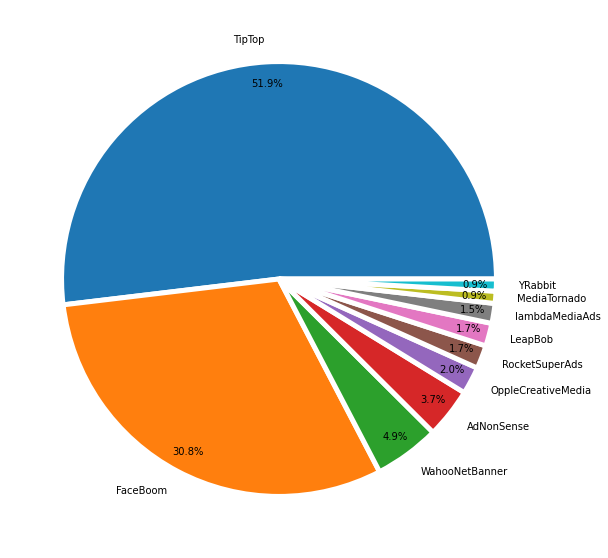

In [37]:
fig = plt.figure(figsize=(10, 10))
plt.pie(channel_cost['costs'],
        labels=channel_cost['channel'],
        labeldistance=1.1, pctdistance=0.9,  wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, autopct='%1.1f%%')
plt.show()

Больше половины рекламного бюджета 51.9% потратили на TipTop. На втором месте FaceBoom c 30.8% бюджета. У остальных источников куски "пирога" суммарно менее 20%.

**4.3 Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.**

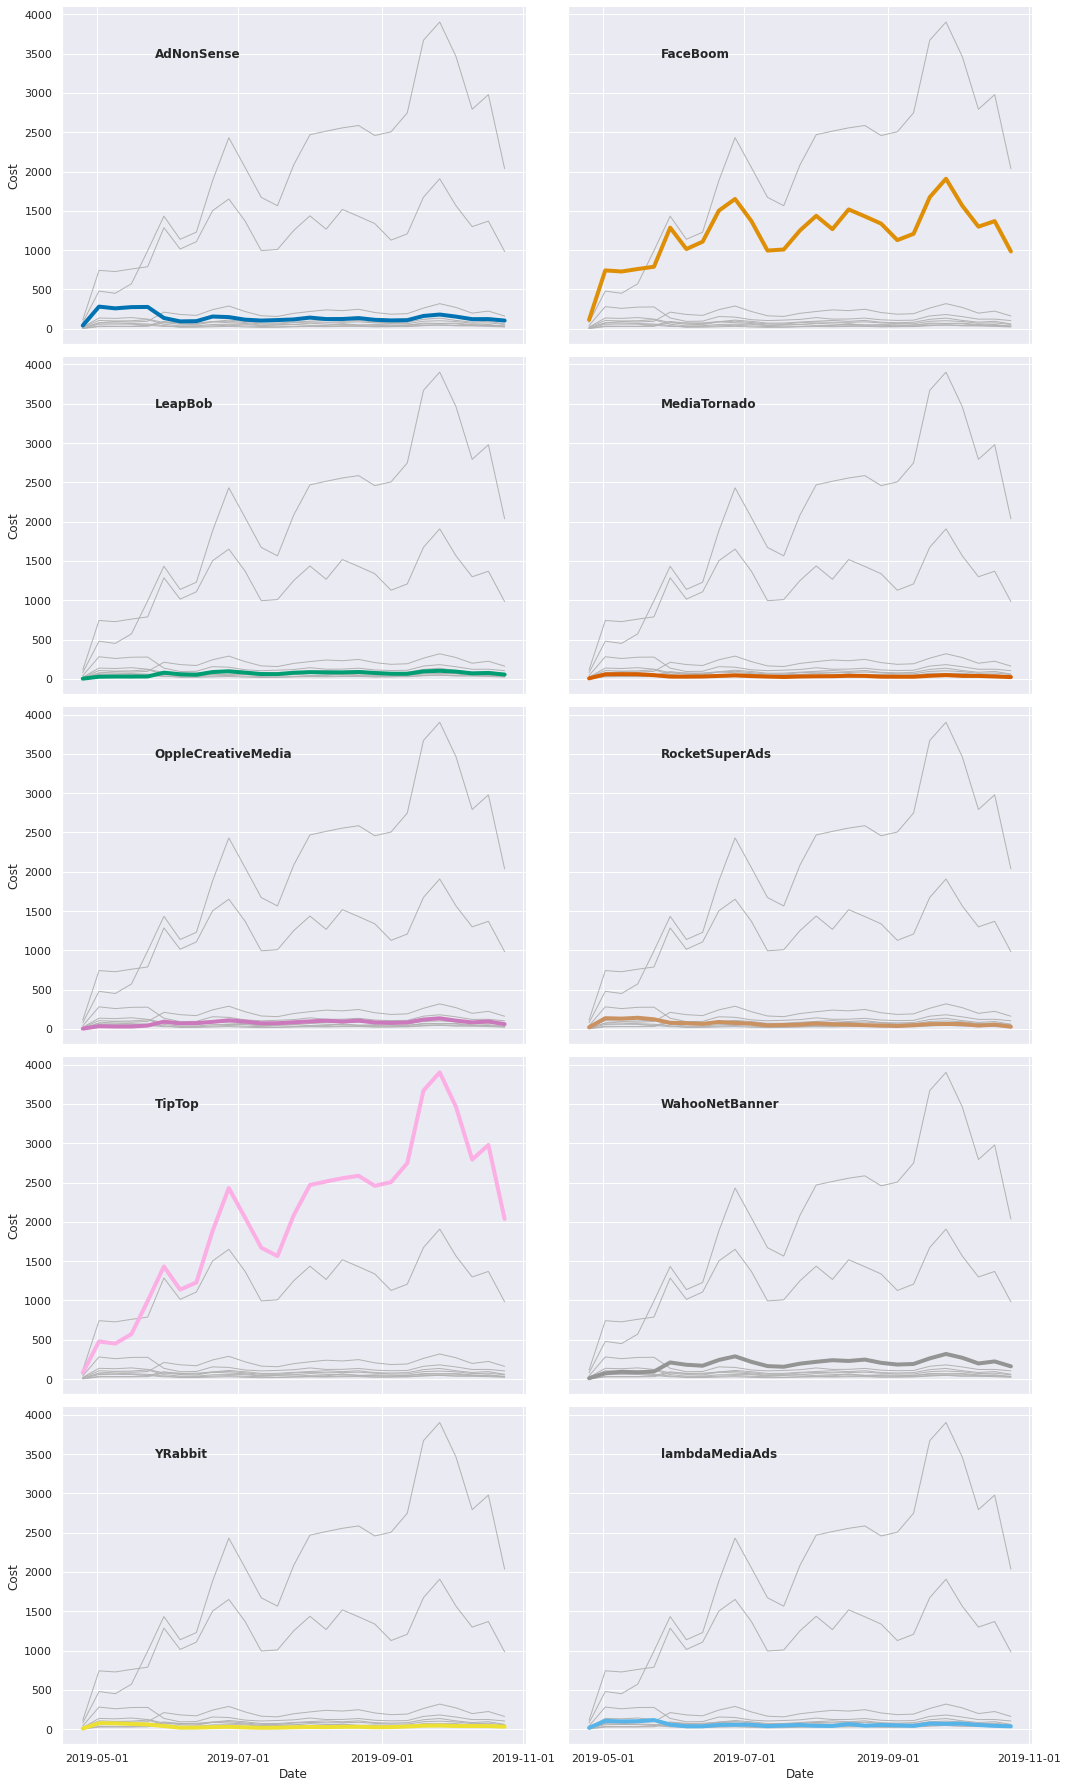

In [38]:
profiles['week'] = profiles['dt'].astype('datetime64[W]')
sum_costs = profiles[profiles['channel']!='organic'].groupby(['channel', 'week'])['acquisition_cost'].sum().reset_index()

sns.set_theme(style="darkgrid")
costs_plot = sns.relplot(
    data=sum_costs,
    x="week", y="acquisition_cost", col="channel", hue="channel",
    kind="line", palette="colorblind", linewidth=4, zorder=5,
    col_wrap=2, height=5, aspect=1.5, legend=False,
)

for channel, ax in costs_plot.axes_dict.items():
    ax.text(.2, .85, channel, transform=ax.transAxes, fontweight="bold")

    sns.lineplot(
        data=sum_costs, x="week", y="acquisition_cost", units="channel",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

ax.set_xticks(ax.get_xticks()[::2])

costs_plot.set_titles("")
costs_plot.set_axis_labels("Date", "Cost")
costs_plot.tight_layout()

Анализируя суммарные расходы по неделям, можно сказать, что в основном рекламный бюджет тратится на TipTop и FaceBoom. Кроме того, наблюдаем рост расходов от месяца к месяцу вплоть до октября и далее сокращение расходов в последнем месяце. 

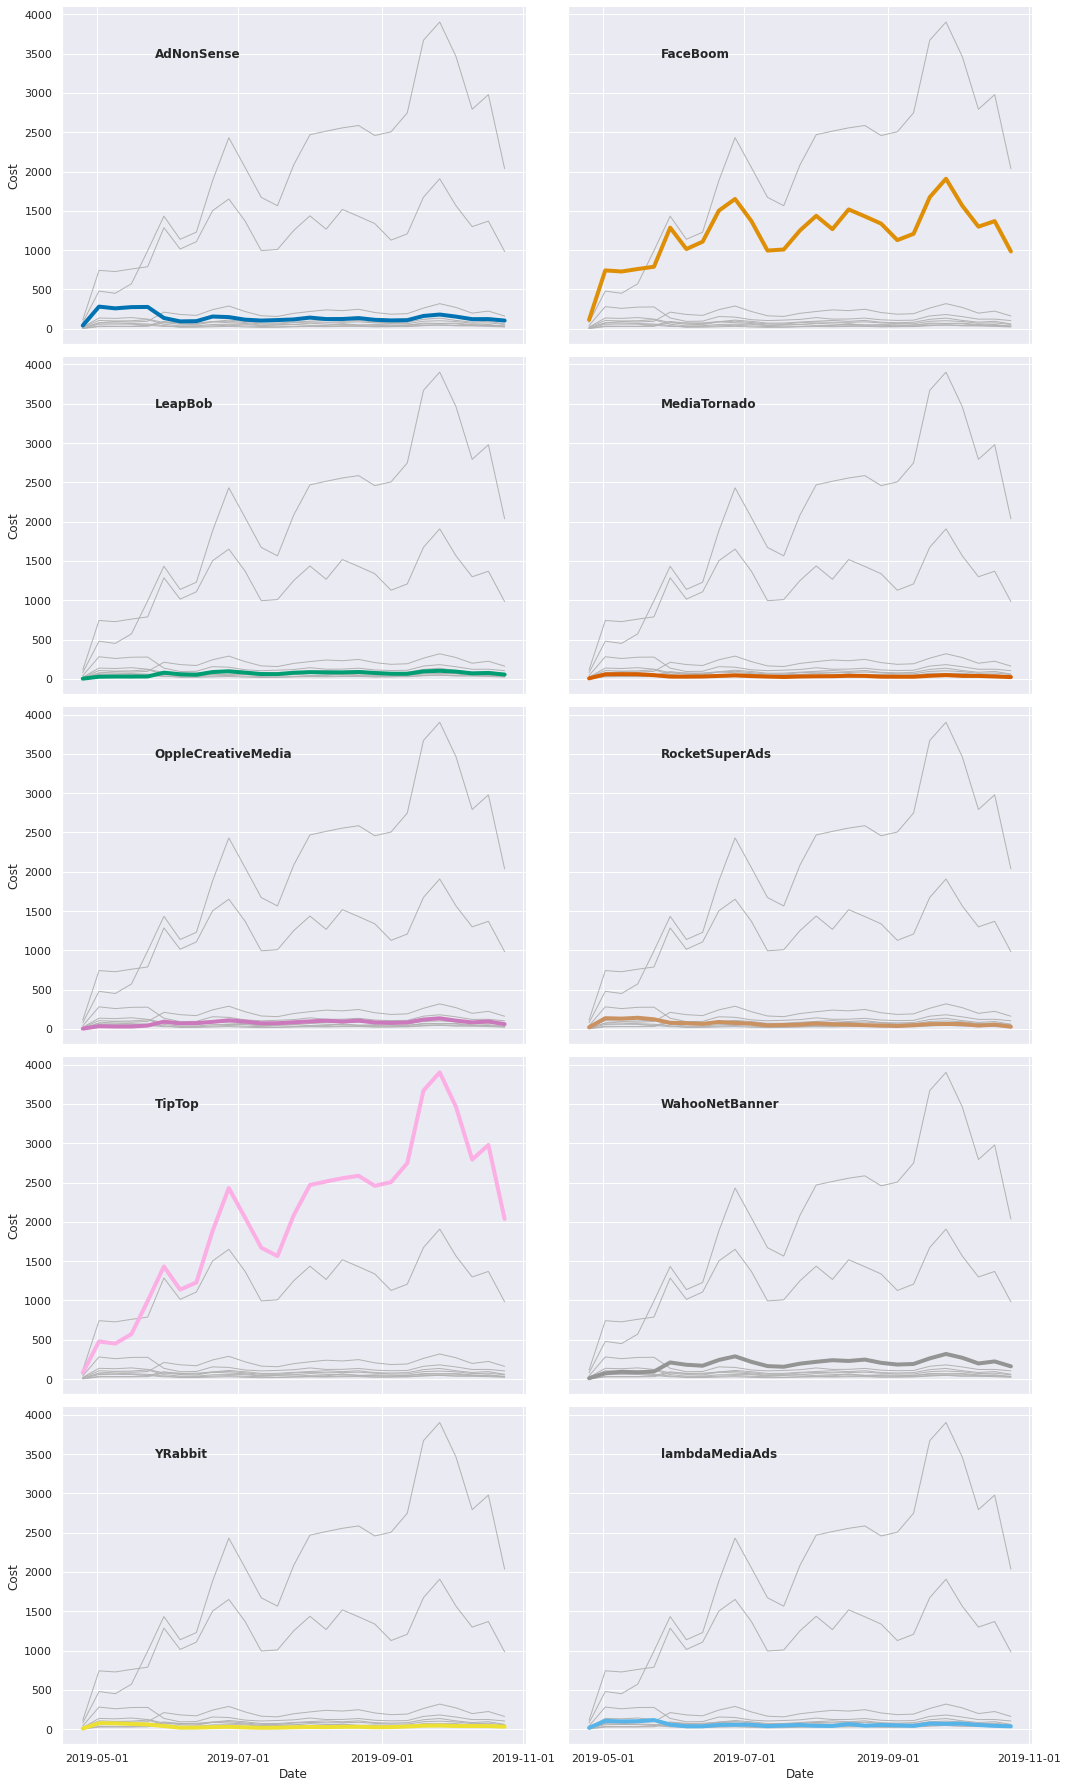

In [41]:
profiles['month'] = profiles['dt'].astype('datetime64[W]')
sum_costs = profiles[profiles['channel']!='organic'].groupby(['channel', 'month'])['acquisition_cost'].sum().reset_index()

sns.set_theme(style="darkgrid")
costs_plot = sns.relplot(
    data=sum_costs,
    x="month", y="acquisition_cost", col="channel", hue="channel",
    kind="line", palette="colorblind", linewidth=4, zorder=5,
    col_wrap=2, height=5, aspect=1.5, legend=False,
)

for channel, ax in costs_plot.axes_dict.items():
    ax.text(.2, .85, channel, transform=ax.transAxes, fontweight="bold")

    sns.lineplot(
        data=sum_costs, x="month", y="acquisition_cost", units="channel",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

ax.set_xticks(ax.get_xticks()[::2])

costs_plot.set_titles("")
costs_plot.set_axis_labels("Date", "Cost")
costs_plot.tight_layout()

Анализируя суммарные расходы по месяцам, можно сказать, что также в основном рекламный бюджет тратится на TipTop и FaceBoom. 

**4.4 Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника**

In [42]:
profiles['acquisition_cost'].mean()

0.7032778251826568

In [43]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


 Самая большая средняя стоимость привлечения у TipTop, она более чем в два раза больше средней стоимости по проекту. А стоимость привлечения у FaceBoom примерно равняется средней и не сильно больше, чем у ближайших конкурентов, далее от канала к каналу стоимость снижается постепенно.

**4.5 Построим визуализацию динамики изменения CAC во времени по неделям по каждому источнику.**



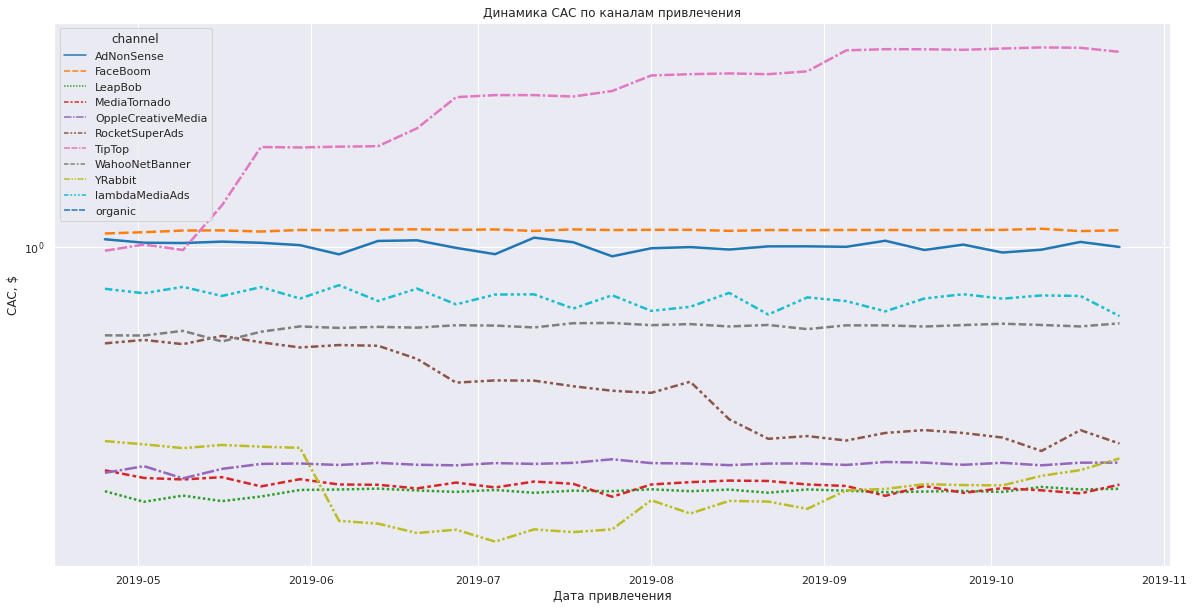

In [44]:
fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=profiles.pivot_table(index='week', columns='channel', values='acquisition_cost', aggfunc='mean'), 
             palette="tab10", linewidth=2.5).set_yscale("log") #построим график, применив логарифметическую шкалу
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Самую стабильную стоимость привлечения показывает FaceBoom. У TipTop стоимость привлечения значительно увеличивается примерно каждый месяц.

Самыми "дорогими" стали пользователи, привлеченные через рекламные компании TipTop. Среди пользоваталей, пришедших благодаря рекламе, дешевле всего обошлось привлеченние одного пользователя через канал leapbob. Средний cac по проекту составил 0,7. Так же из графиков можно сделать вывод, что самыми дорогими стали рекламные компании tiptop и faceboom. Расходы на них заметно менялись он недели к неделе, но все равно имели общую тенденцию к росту. При этом затраты на рекламу в tiptop росли быстрее, а затраты на faceboom стабилизировались за последние два месяца и перестали так активно расти.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [ ]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
profiles = profiles[profiles['channel']!='organic']

**5.1 Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.**

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Реклама не окупается. ROI к концу второй недели приблизился к 80%. Динамика ROI имеет тенденцию к снижению. Динамика LTV имеет пики и спады, что свойственно периодам рекламных компаний, однако имеет относительную стабильность, значит проблема не в пользователях. А вот CAC с течением времени увеличивается.

**5.2 Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей.**

In [ ]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия у пользователей PC ниже, чем у остальных девайсов.Скорее всего реклама на PC будет иметь меньшую цену. 

**5.3 Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Быстрый рост в стоимости привлечения показывают Mac и iPhone.В динамике мы видим, что и на PC цены привлечения растут и ROI в последние месяцы показывает убточность.

Построим удержание с разбивкой по устройствам

In [ ]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей PC несильно, но лучше, чем у других платформ. То есть реклама на PC хуже конвертируется, но имеет ниже стоимость и лучше удержание пользователей.

Проверим конверсию пользователей и динамику её изменения с разбивкой по странам. То же самое сделаем с удержанием пользователей.

In [ ]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из США значительно лучше, чем у других стран. Ожидаем, что и цена на рынке США будет выше.

**5.4 Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама во Франции, Германии и Великобритании стабильно окупается к концу первой недели, так как LTV более менее стабилен, а CAC даже немного упал в июне. Реклама в Америке не окупается, LTV в динамике стабилен, выше, чем у других стран, как мы помним из предыдущего исследования и конверсия у США выше, однако стоимость привлечения показывает постоянный рост, что тянет ROI c каждым месяцем все ниже. В итоге реклама в США оказалась переоценена, ее стоимость выше, чем мы можем получить от нее.

Построим удержание с разбивкой по странам

In [ ]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Да пользователи из США лучше конвертируются и больше платят, за это рекламодатели берут больше за рекламу в США, но видимо не учитывают, что удержание платящих пользователей из США значительно уступает другим странам. Теперь у нас есть аргумент договариваться с рекламодателями снижать стоимость рекламы в США.

Проверим конверсию пользователей и динамику её изменения с разбивкой по каналам привлечения. То же самое сделаем с удержанием пользователей.

In [ ]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лидеhами по конверсии являются FaceBoom, AdNonSense и lambdaMediaADS

**5.5 Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)  

Не окупается реклама купленная у TipTop, FaceBoom и AdNonSense. У TipTop это связано со значительным ростом стоимости привлечения со временнем, так как в самом начале ROI был больше единицы. У FaceBoom и AdNonSense LTV и CAC стабильны, значит изначально был ошибочно рассчитан срок окупаемости от этих каналов.

Построим удержание с разбивкой по каналам привлечения

In [ ]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи с FaceBoom и AdNonSense значительно хуже удерживаются по сравнению с пользователями из других каналов привлечения.

Оценив окупаемость рекламы, можно сделать такие вывод,чтов целом реклама, направленная на привлечение пользователей, не окупается.Расходы на рекламу для пользоваталей mac, iphone и android можно уменьшить, эти устроиства и без того приводят в сервис много пользоваталей. Также крайне негативное влияние на окупаемость оказали рекламные компании в США и реклама в канале tiptop. Расходы на эти рекламные компании также рекомендуется сократить. Для увеличения окупаемости можно провести мероприятия по увеличению удержания пользоваталей pc, проживающих в США и приходящих через рекламные компании в faceboom и adnonsense: выяснить проблемы, с которым сталкиваются пользователи при использовании сервиса.Также для привлечения большего количества пользоваталей можно увеличить количество рекламных компаний в канале yrabbit, т.к. в рассмотренном периоде он оказался самым прибыльным в расчете на одного пользователя, при этом привлек относительно небольшое число клиентов.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В нашем приложении основная часть пользователей из США, если брать платящих пользователей то пользователи из США состовляют более 75% от общего числа. Распределение по устройствам равномерное. Из FaceBoom привлечено 40% платящих пользователей, из TipTop 21%, органических - 13%. Больше поливины рекламного бюджета уходит на TipTop, 30% на FaceBoom. Реклама не окупается, LTV стабилен, CAC растет.

У всех устройств стабильный LTV с течением времени и у всех тенденция на увеличение CAC.

Анализ по странам показал, что пользователи из Европы приносят хорошие деньги за небольшие затраты (CAC стабилен). Бизнес в Европе показывает хорошую доходность, что нельзя сказать по США. В США рекламодатели сильно переоценивают качество пользователей (да они больше платят и лучше конвертируются, чем в Европе), но сильный рост CAC нивелирует все эти преимущества, к тому же пользователи из США хуже удерживаются.

Анализ по каналам привлеченим выявил, что для каналов FaceBoom и AdNonSense неверно был расчитан срок окупаемости изначально. Пользователи из этих каналов имеют хорошую конвертацию,но денег приносят меньше, чем мы платим за рекламу и за две недели не успевают окупить своё привлечение. Пользователи из TipTop сначала окупали своё привлечение, однако реклама на платформе дорожает сильно и часто и пользователи привлеченные из TipTop стали для нас "золотыми".

Рекомендации:

1. Разбросать пользователей по странам (слишком большой процент пользователей из США).
2. Снизить стоимость рекламы в США (аргумент - пользователи из США слишком плохо удерживаются, они переоценены).
3. Попробовать договориться о снижении стоимости рекламы у FaceBoom, AdNonSense (аргумент - слишком плохо удерживаются).
4. Рассмотреть отказ от рекламы в TipTop, так как стоимость необоснованно дорогая.
5. Деверсифицировать расходы на рекламу. Хочу отметить lambdaMediaAds, которые имеют хорошую конвертацию, пользователи платежеспособны и хорошо удерживаются.